<a href="https://colab.research.google.com/github/SLTH-Project/ThSL-Model/blob/main/Train/Test_Visualize_My_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize'

/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize


In [ ]:
%cd '/content'

/content


In [ ]:
from zipfile import ZipFile
file_name = '/content/train.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


#Import

In [ ]:
from numpy import expand_dims
import numpy as np

import keras
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


import tensorflow
import tensorflow as tf

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

from PIL import Image 
from PIL import ImageFilter 

from scipy import ndimage
from skimage.transform import resize

import os
from os import listdir

import cv2
import time


Val

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model, load_model
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers import BatchNormalization

#Split folder (large dataset)

In [ ]:
!pip install split_folders

In [ ]:
pip install split-folders tqdm

## Train : Validation : Test 

In [ ]:
import splitfolders 

In [ ]:
TRAIN_DATA_PATH = '/content/train/'

70 : 10 : 20

In [ ]:
SAVE_DATA_PATH_A = '/content/example/'
os.makedirs(SAVE_DATA_PATH_A)


In [ ]:
splitfolders.ratio(TRAIN_DATA_PATH, output=SAVE_DATA_PATH_A, seed=1337, ratio=(0.7, 0.1, 0.2)) # (train:val:test)


Copying files: 8 files [00:00, 881.80 files/s]


#Load dataset

In [ ]:
SIZE =224
CLASS_MODE ='sparse'  #sparse
BATCH_SIZE = 128
NUM_CLASS=50
COLOR_MODE ='rgb'
CHANNEL = 3

In [ ]:
root_dir = '/content/'
dataset_dir = os.path.join(root_dir, 'example')
train_dir = os.path.join(dataset_dir,'train')
test_dir = os.path.join(dataset_dir, 'test')
val_dir = os.path.join(dataset_dir, 'val')

Trian

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
train_generator = train_datagen.flow_from_directory(train_dir, # this is where you specify the path to the main data folder
                                                 target_size=(SIZE, SIZE),
                                                 color_mode=COLOR_MODE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE,
                                                 seed=123,
                                                 shuffle=True
                                                 )

Found 4 images belonging to 2 classes.


Test

In [ ]:
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
test_generator = train_datagen.flow_from_directory(test_dir, # this is where you specify the path to the main data folder
                                                  target_size=(SIZE, SIZE),
                                                 color_mode=COLOR_MODE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE,
                                                 seed=123,
                                                 shuffle=True
                                                 )

Found 4 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input) #included in our dependencies
val_generator = val_datagen.flow_from_directory(val_dir, # this is where you specify the path to the main data folder
                                                  target_size=(SIZE, SIZE),
                                                 color_mode=COLOR_MODE,
                                                 batch_size=BATCH_SIZE,
                                                 class_mode=CLASS_MODE,
                                                 seed=123,
                                                 shuffle=True
                                                )

Found 0 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
conv_base_MobileNet  = tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE,CHANNEL))

In [ ]:
for layer in conv_base_MobileNet.layers:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base_MobileNet.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_2 - False
1 rescaling_1 - False
2 Conv - False
3 Conv/BatchNorm - False
4 tf.__operators__.add_28 - False
5 re_lu_33 - False
6 tf.math.multiply_28 - False
7 multiply_19 - False
8 expanded_conv/depthwise/pad - False
9 expanded_conv/depthwise - False
10 expanded_conv/depthwise/BatchNorm - False
11 re_lu_34 - False
12 expanded_conv/squeeze_excite/AvgPool - False
13 expanded_conv/squeeze_excite/Conv - False
14 expanded_conv/squeeze_excite/Relu - False
15 expanded_conv/squeeze_excite/Conv_1 - False
16 tf.__operators__.add_29 - False
17 re_lu_35 - False
18 tf.math.multiply_29 - False
19 expanded_conv/squeeze_excite/Mul - False
20 expanded_conv/project - False
21 expanded_conv/project/BatchNorm - False
22 expanded_conv_1/expand - False
23 expanded_conv_1/expand/BatchNorm - False
24 re_lu_36 - False
25 expanded_conv_1/depthwise/pad - False
26 expanded_conv_1/depthwise - False
27 expanded_conv_1/depthwise/BatchNorm - False
28 re_lu_37 - False
29 expanded_conv_1/project - False
30 expand

In [ ]:
def create_model (conv_base):
  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(256, activation='relu'))

  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(128, activation='relu'))

  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(64, activation='relu'))

  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())

  model.add(layers.Dense(2, activation='softmax'))
  model.summary()
  return model

In [ ]:
modelf= create_model(conv_base_MobileNet)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 batch_normalization_24 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 256)               262400    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_25 (Bat  (None, 256)            

In [ ]:
SAVE_model_B_rmsProp_1 ='/content/modelf.h5'
EPOCH = 10

opt_rmsProp = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
early_stop = keras.callbacks.EarlyStopping(min_delta=0.0001,patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint(SAVE_model_B_rmsProp_1 )

modelf.compile(optimizer= opt_rmsProp , loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy

In [ ]:


historyf= modelf.fit(
                   train_generator,
                   steps_per_epoch = 1,
                   epochs = EPOCH,
                   validation_data = val_generator,
                   validation_steps = 1,
                   callbacks=[early_stop,check_point]
                   )

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.7500WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1/1 [==============================] - 6s 6s/step - loss: 0.3593 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 382ms/step - loss: 0.2660 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 383ms/step - loss: 0.4676 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 382ms/step - loss: 1.6167 - accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 375ms/step - loss: 1.4673 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 368ms/step - loss: 1.1997 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 396ms/step - loss: 1.0195 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 401ms/step - loss: 1.1778 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 396ms/step - loss: 0.1698 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 358ms/step - loss: 0.2949 - accuracy: 1.0000


In [ ]:
# If we want to use a customized CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_9 (Flatten)         (None, 173056)          

In [ ]:
SAVE_model_B_rmsProp_1 ='/content/model.h5'
EPOCH = 10

opt_rmsProp = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
early_stop = keras.callbacks.EarlyStopping(min_delta=0.0001,patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint(SAVE_model_B_rmsProp_1 )

model.compile(optimizer= opt_rmsProp , loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy

In [ ]:

historyf= model.fit(
                   train_generator,
                   steps_per_epoch = 1,
                   epochs = EPOCH,
                   validation_data = val_generator,
                   validation_steps = 1,
                   callbacks=[early_stop,check_point]
                   )

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.3466 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 741ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 729ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 746ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 731ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 750ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 779ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 1s 735ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 1s 706ms/step - loss: 8.0590 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 1s 809ms/step - loss: 8.0590 - accuracy: 0.5000


In [ ]:
%cd '/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize'

/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize


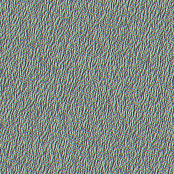

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31


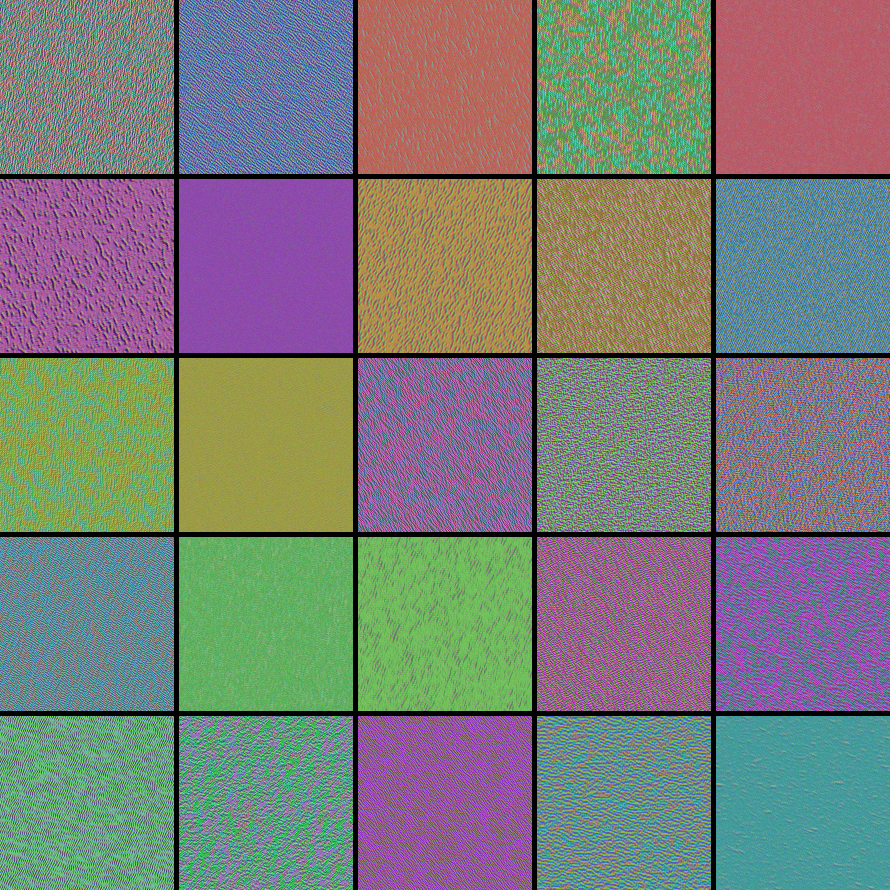

In [ ]:
import visualize_filter
LayerName = 'conv2d_16'
visualize_filter.visualize_filters(224, 224, LayerName, model)

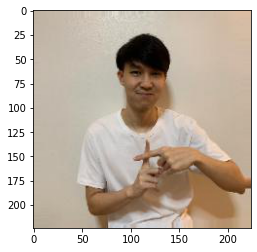

(1, 224, 224, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/train/add/aug__0_127.jpg'
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['add', 'animal']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = model.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: add


Layer # 0 , Shape : (1, 222, 222, 32)


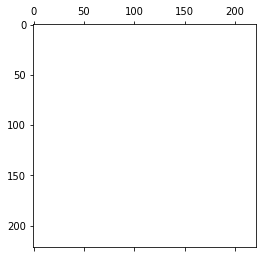

Layer # 1 , Shape : (1, 111, 111, 32)


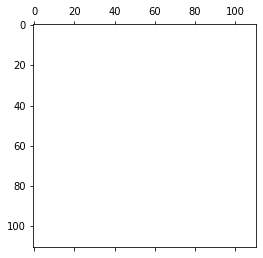

Layer # 2 , Shape : (1, 109, 109, 64)


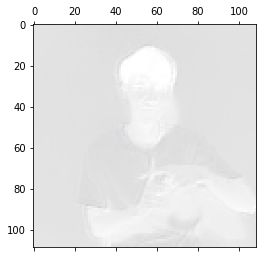

Layer # 3 , Shape : (1, 54, 54, 64)


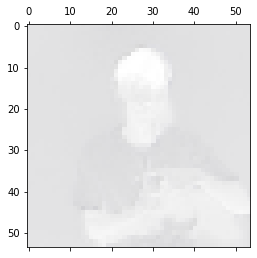

Layer # 4 , Shape : (1, 52, 52, 64)


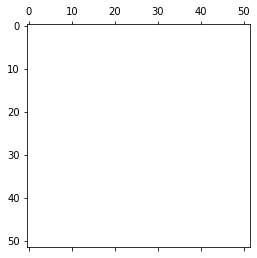

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in model.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0
for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()

#train 1 [MobileNet]

In [ ]:
from keras.applications.mobilenet import MobileNet

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

for layer in base_model.layers:
    layer.trainable = False

x=base_model.output
x=GlobalAveragePooling2D()(x)
# x=Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(512, activation='relu')(x) #dense layer 2
x=Dense(256, activation='relu')(x) #dense layer 3
x=Dense(64, activation='relu')(x)
preds=Dense(2, activation='softmax')(x) #final layer with softmax activation

model2=Model(inputs=base_model.input, outputs=preds)
model2.summary()

Model: "model_1984"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                 

In [ ]:
SAVE_model_B_rmsProp_1 ='/content/model2.h5'
EPOCH = 10

opt_rmsProp = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
early_stop = keras.callbacks.EarlyStopping(min_delta=0.0001,patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint(SAVE_model_B_rmsProp_1 )

model2.compile(optimizer= opt_rmsProp , loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy

In [ ]:

historyf= model2.fit(
                   train_generator,
                   steps_per_epoch = 1,
                   epochs = EPOCH,
                   validation_data = val_generator,
                   validation_steps = 1,
                   callbacks=[early_stop,check_point]
                   )

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.7926 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 722ms/step - loss: 0.6209 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 681ms/step - loss: 0.5278 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 1s 676ms/step - loss: 0.4600 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 1s 825ms/step - loss: 0.4104 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 445ms/step - loss: 0.3695 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 396ms/step - loss: 0.3378 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 449ms/step - loss: 0.3096 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 449ms/step - loss: 0.2865 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 440ms/step - loss: 0.2656 - accuracy: 1.0000


In [ ]:
%cd '/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize'

/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize


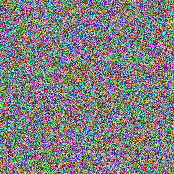

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31


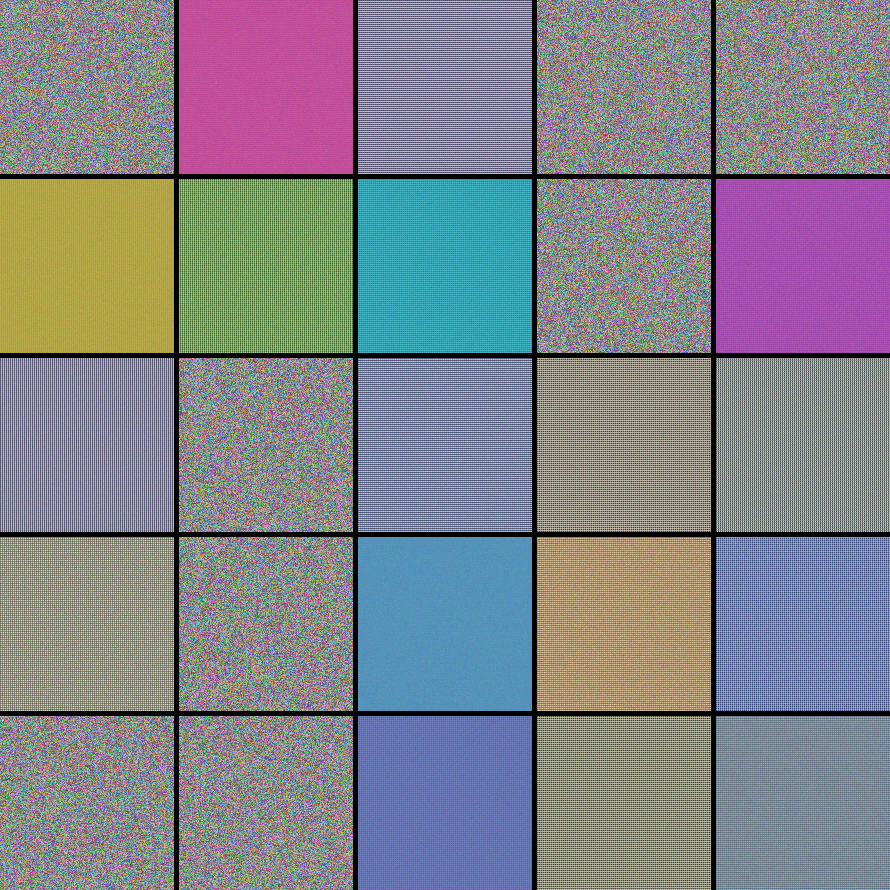

In [ ]:
import visualize_filter
LayerName = 'conv1'
visualize_filter.visualize_filters(224, 224, LayerName, model2)

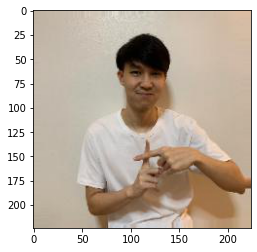

(1, 224, 224, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/train/add/aug__0_127.jpg'
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['add', 'animal']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = model2.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: animal


Layer # 0 , Shape : (1, 224, 224, 3)


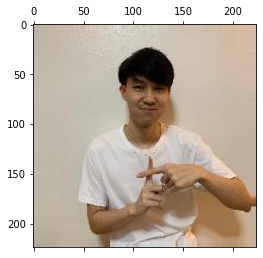

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 1 , Shape : (1, 112, 112, 32)


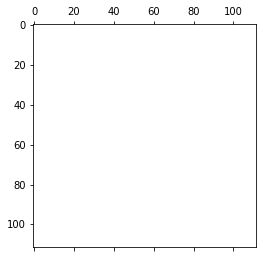

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 2 , Shape : (1, 112, 112, 32)


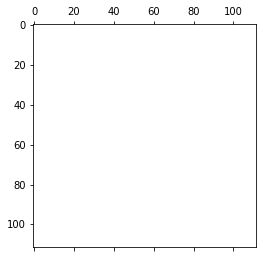

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 3 , Shape : (1, 112, 112, 32)


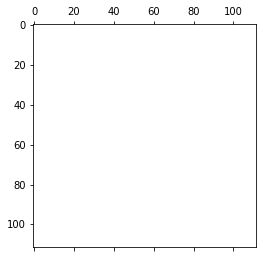

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 4 , Shape : (1, 112, 112, 32)


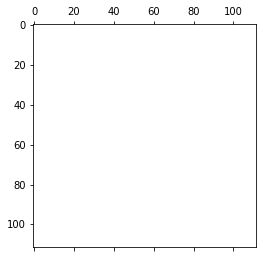

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 5 , Shape : (1, 112, 112, 32)


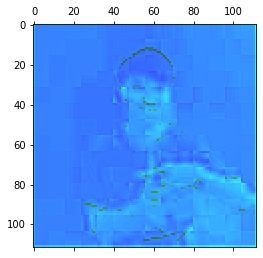

Layer # 6 , Shape : (1, 112, 112, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


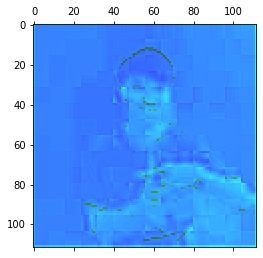

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 7 , Shape : (1, 112, 112, 64)


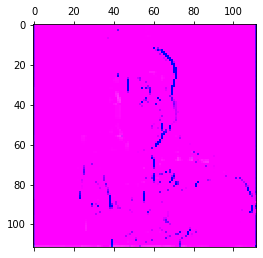

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 8 , Shape : (1, 112, 112, 64)


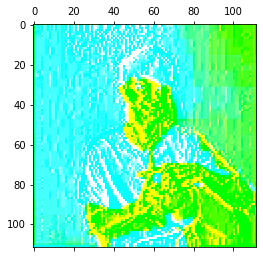

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 9 , Shape : (1, 112, 112, 64)


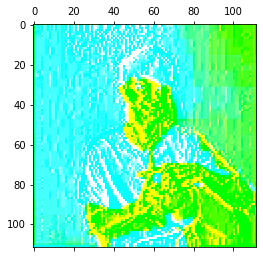

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 10 , Shape : (1, 113, 113, 64)


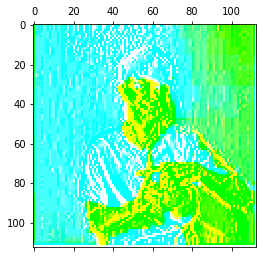

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 11 , Shape : (1, 56, 56, 64)


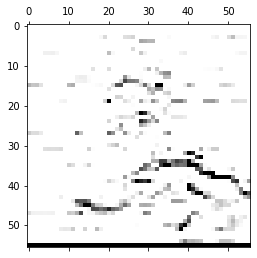

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 12 , Shape : (1, 56, 56, 64)


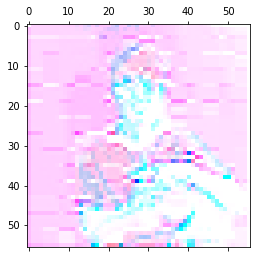

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 13 , Shape : (1, 56, 56, 64)


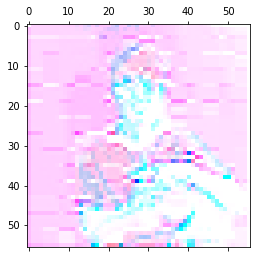

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 14 , Shape : (1, 56, 56, 128)


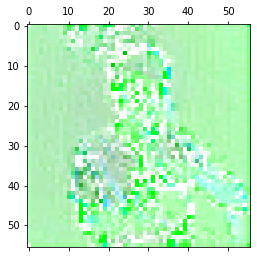

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 15 , Shape : (1, 56, 56, 128)


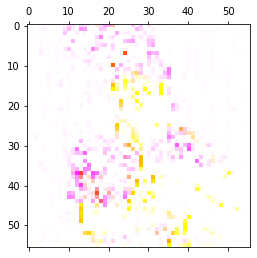

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 16 , Shape : (1, 56, 56, 128)


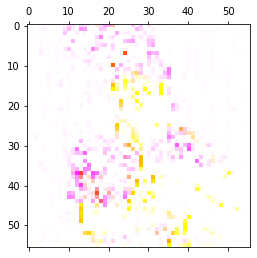

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 17 , Shape : (1, 56, 56, 128)


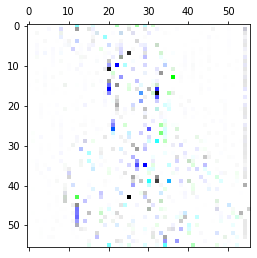

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 18 , Shape : (1, 56, 56, 128)


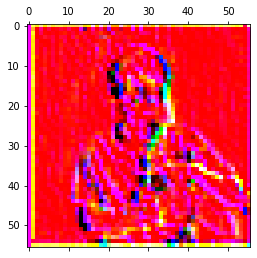

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 19 , Shape : (1, 56, 56, 128)


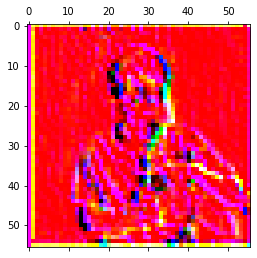

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 20 , Shape : (1, 56, 56, 128)


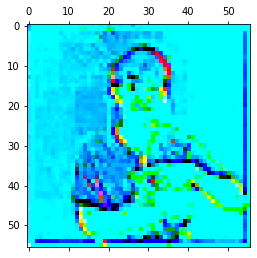

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 21 , Shape : (1, 56, 56, 128)


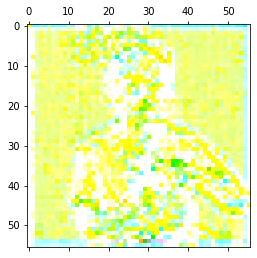

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 22 , Shape : (1, 56, 56, 128)


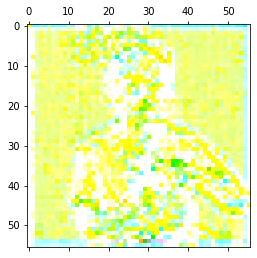

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 23 , Shape : (1, 57, 57, 128)


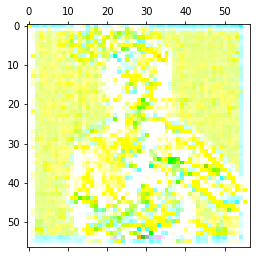

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 24 , Shape : (1, 28, 28, 128)


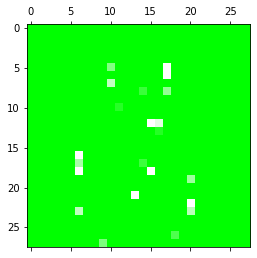

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 25 , Shape : (1, 28, 28, 128)


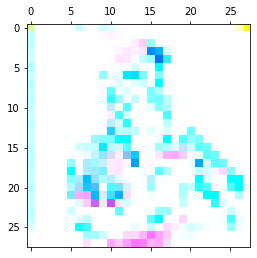

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 26 , Shape : (1, 28, 28, 128)


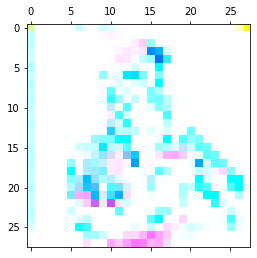

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 27 , Shape : (1, 28, 28, 256)


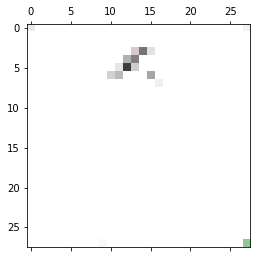

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 28 , Shape : (1, 28, 28, 256)


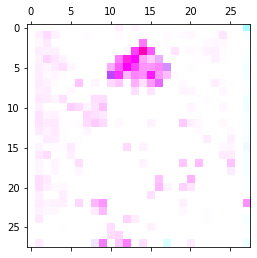

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 29 , Shape : (1, 28, 28, 256)


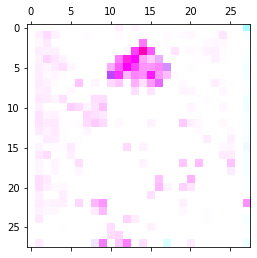

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 30 , Shape : (1, 28, 28, 256)


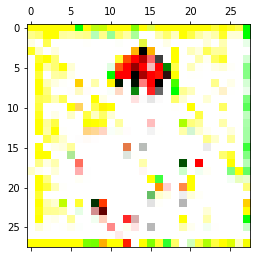

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 31 , Shape : (1, 28, 28, 256)


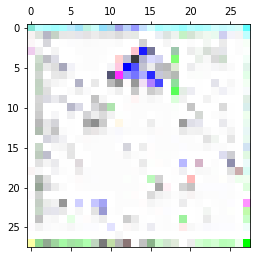

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 32 , Shape : (1, 28, 28, 256)


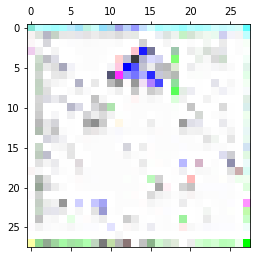

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 33 , Shape : (1, 28, 28, 256)


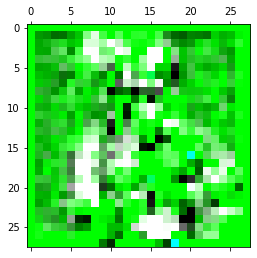

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 34 , Shape : (1, 28, 28, 256)


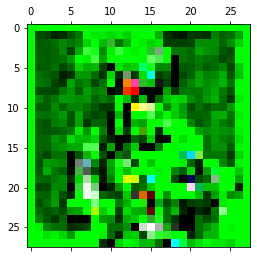

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 35 , Shape : (1, 28, 28, 256)


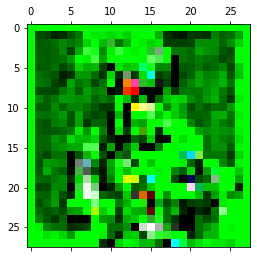

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 36 , Shape : (1, 29, 29, 256)


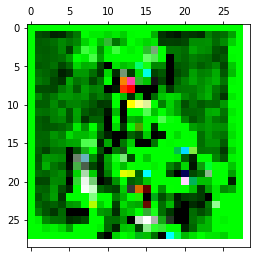

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 37 , Shape : (1, 14, 14, 256)


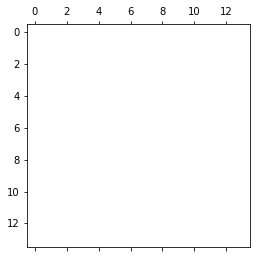

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 38 , Shape : (1, 14, 14, 256)


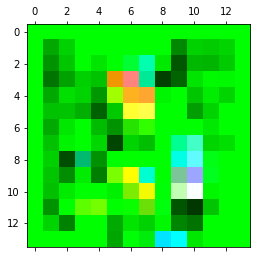

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 39 , Shape : (1, 14, 14, 256)


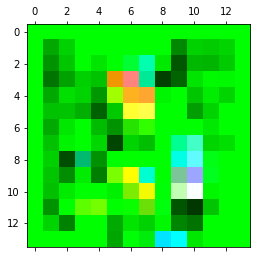

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 40 , Shape : (1, 14, 14, 512)


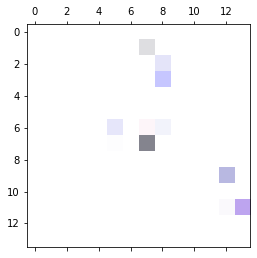

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 41 , Shape : (1, 14, 14, 512)


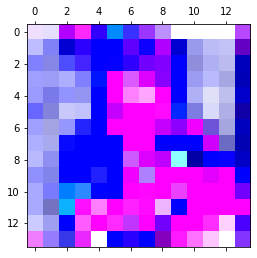

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 42 , Shape : (1, 14, 14, 512)


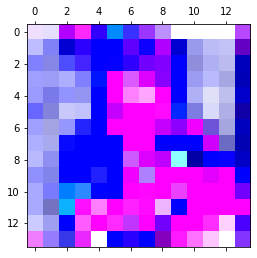

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 43 , Shape : (1, 14, 14, 512)


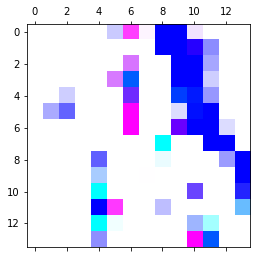

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 44 , Shape : (1, 14, 14, 512)


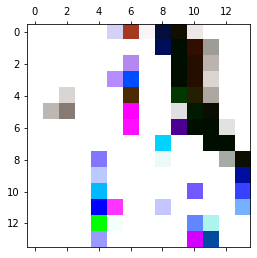

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 45 , Shape : (1, 14, 14, 512)


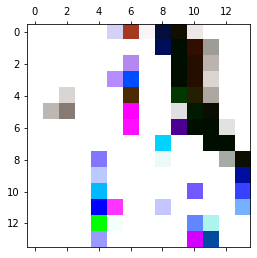

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 46 , Shape : (1, 14, 14, 512)


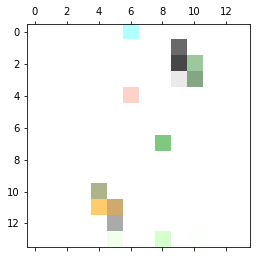

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 47 , Shape : (1, 14, 14, 512)


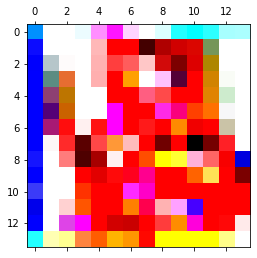

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 48 , Shape : (1, 14, 14, 512)


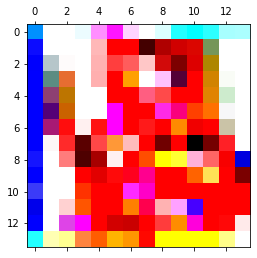

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 49 , Shape : (1, 14, 14, 512)


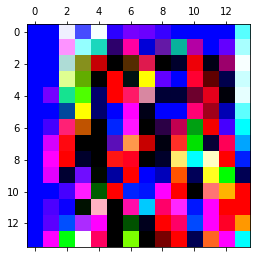

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 50 , Shape : (1, 14, 14, 512)


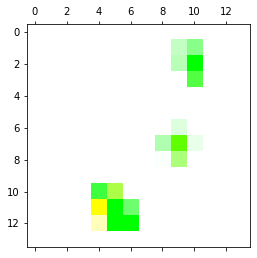

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 51 , Shape : (1, 14, 14, 512)


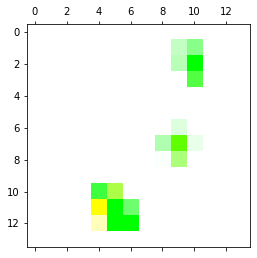

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 52 , Shape : (1, 14, 14, 512)


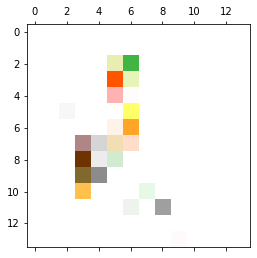

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 53 , Shape : (1, 14, 14, 512)


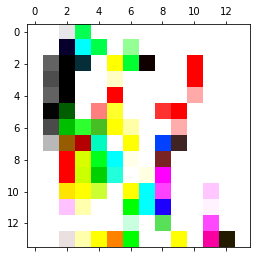

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 54 , Shape : (1, 14, 14, 512)


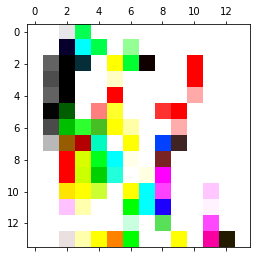

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 55 , Shape : (1, 14, 14, 512)


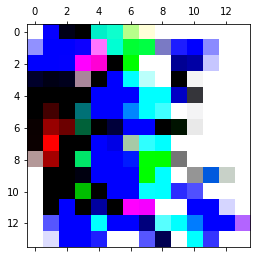

Layer # 56 , Shape : (1, 14, 14, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


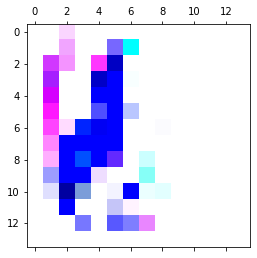

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 57 , Shape : (1, 14, 14, 512)


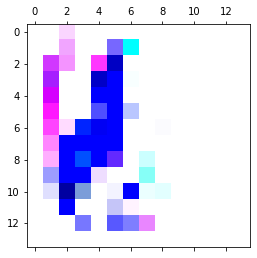

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 58 , Shape : (1, 14, 14, 512)


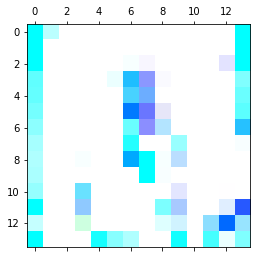

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 59 , Shape : (1, 14, 14, 512)


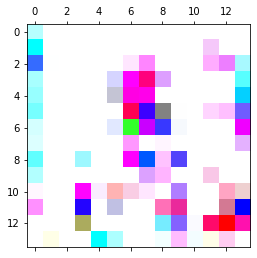

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 60 , Shape : (1, 14, 14, 512)


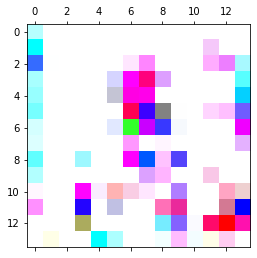

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 61 , Shape : (1, 14, 14, 512)


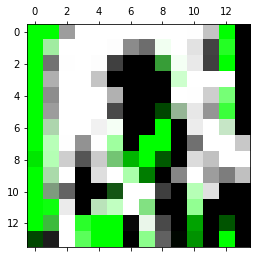

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 62 , Shape : (1, 14, 14, 512)


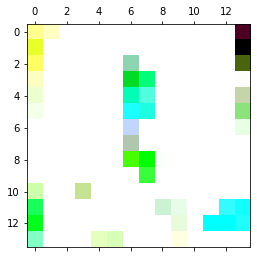

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 63 , Shape : (1, 14, 14, 512)


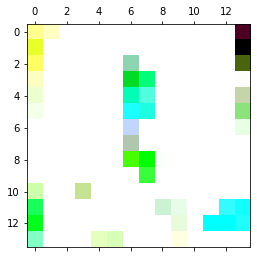

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 64 , Shape : (1, 14, 14, 512)


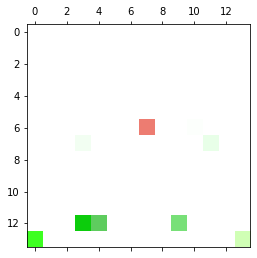

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 65 , Shape : (1, 14, 14, 512)


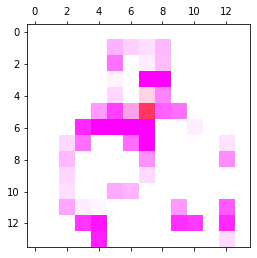

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 66 , Shape : (1, 14, 14, 512)


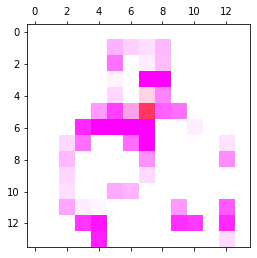

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 67 , Shape : (1, 14, 14, 512)


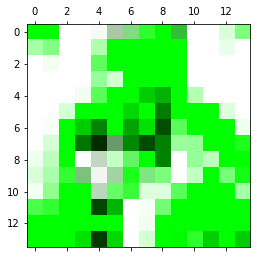

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 68 , Shape : (1, 14, 14, 512)


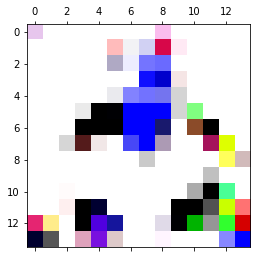

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 69 , Shape : (1, 14, 14, 512)


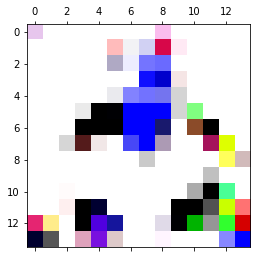

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 70 , Shape : (1, 14, 14, 512)


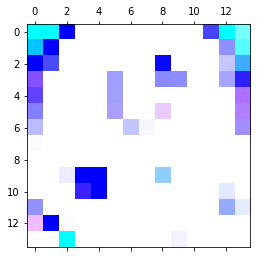

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 71 , Shape : (1, 14, 14, 512)


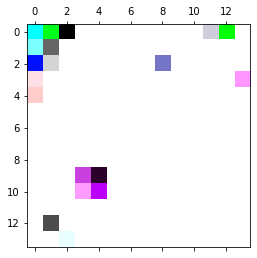

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 72 , Shape : (1, 14, 14, 512)


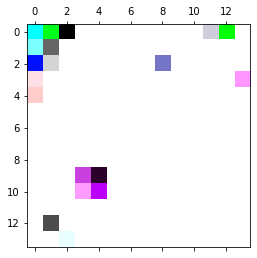

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 73 , Shape : (1, 15, 15, 512)


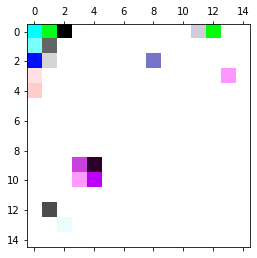

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 74 , Shape : (1, 7, 7, 512)


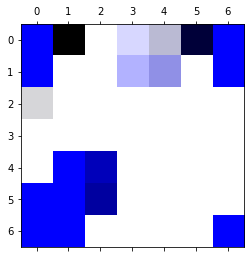

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 75 , Shape : (1, 7, 7, 512)


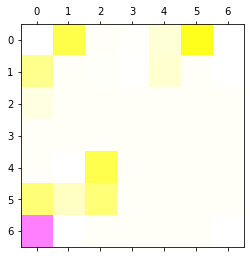

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 76 , Shape : (1, 7, 7, 512)


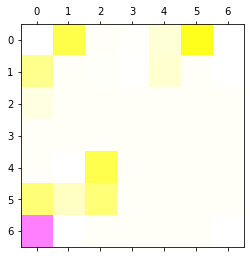

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 77 , Shape : (1, 7, 7, 1024)


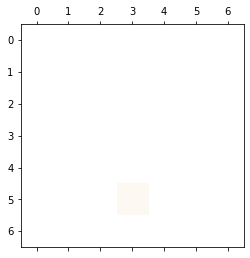

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 78 , Shape : (1, 7, 7, 1024)


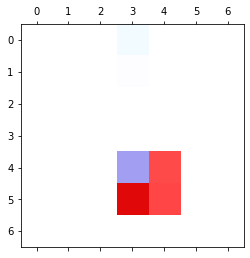

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 79 , Shape : (1, 7, 7, 1024)


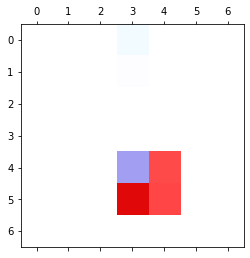

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 80 , Shape : (1, 7, 7, 1024)


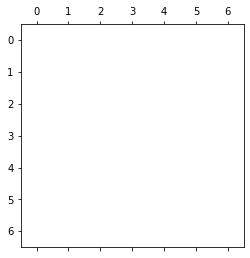

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 81 , Shape : (1, 7, 7, 1024)


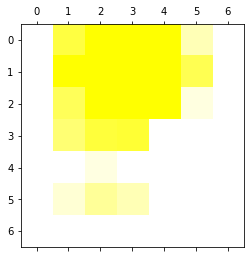

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 82 , Shape : (1, 7, 7, 1024)


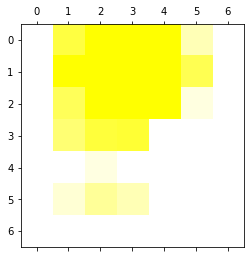

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 83 , Shape : (1, 7, 7, 1024)


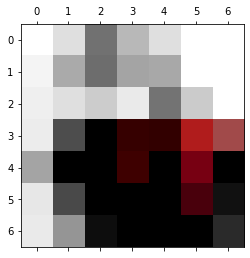

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 84 , Shape : (1, 7, 7, 1024)


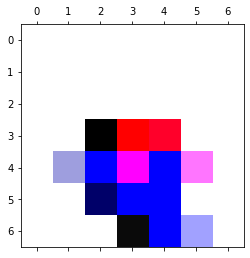

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 85 , Shape : (1, 7, 7, 1024)


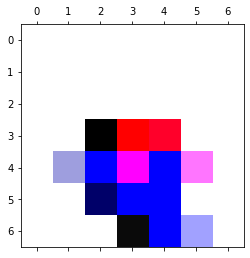

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in model2.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0

for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()



#train 2 [MobileNetV3]  !! ติดบัคในส่วน Visualize activations image

In [ ]:
#base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.
conv_base_MobileNet  = tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE,CHANNEL))
for layer in conv_base_MobileNet.layers:
    layer.trainable = False

x=conv_base_MobileNet.output
x=GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x=Dense(256, activation='relu')(x) 

x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x=Dense(128, activation='relu')(x)

x = Dropout(0.5)(x)
x = BatchNormalization()(x)

x=Dense(64, activation='relu')(x)

x = Dropout(0.5)(x)
x = BatchNormalization()(x) 

preds=Dense(2, activation='softmax')(x) #final layer with softmax activation

model3=Model(inputs=conv_base_MobileNet.input, outputs=preds)
model3.summary()

Model: "model_3013"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                         

In [ ]:
SAVE_model_B_rmsProp_1 ='/content/model3.h5'
EPOCH = 10

opt_rmsProp = tf.keras.optimizers.RMSprop(learning_rate=2e-5)
early_stop = keras.callbacks.EarlyStopping(min_delta=0.0001,patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint(SAVE_model_B_rmsProp_1 )

model3.compile(optimizer= opt_rmsProp , loss='sparse_categorical_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy

In [ ]:

historyf= model3.fit(
                   train_generator,
                   steps_per_epoch = 1,
                   epochs = EPOCH,
                   validation_data = val_generator,
                   validation_steps = 1,
                   callbacks=[early_stop,check_point]
                   )

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 1.6881 - accuracy: 0.0000e+00WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


1/1 [==============================] - 6s 6s/step - loss: 1.6881 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 446ms/step - loss: 0.5810 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 460ms/step - loss: 1.9334 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 432ms/step - loss: 0.9150 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 456ms/step - loss: 1.2543 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 939ms/step - loss: 1.4813 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 471ms/step - loss: 1.1692 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 478ms/step - loss: 1.3418 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 1s 501ms/step - loss: 1.0172 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 471ms/step - loss: 0.6872 - accuracy: 0.5000


In [ ]:
%cd '/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize'

/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/Visualize


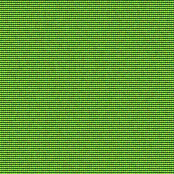

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


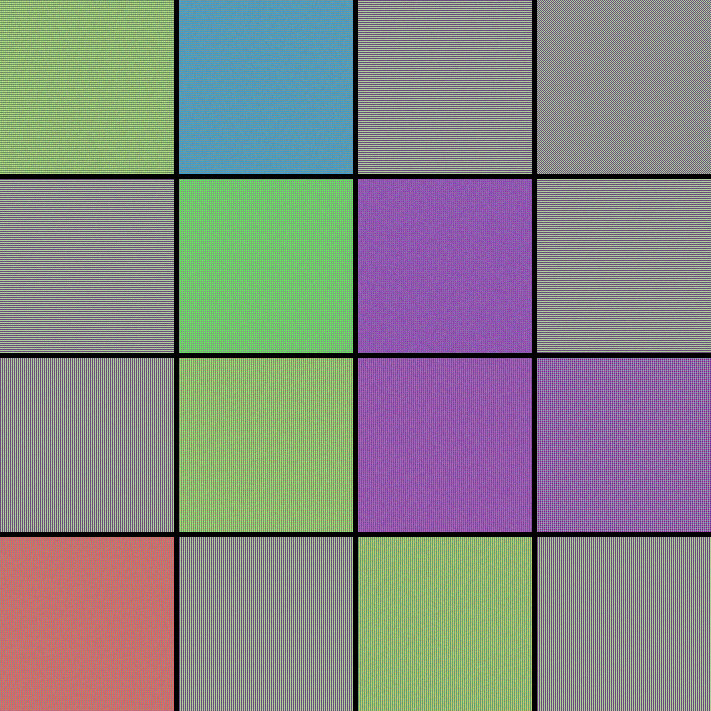

In [ ]:
import visualize_filter
LayerName = 'Conv'
visualize_filter.visualize_filters(224, 224, LayerName, model3)

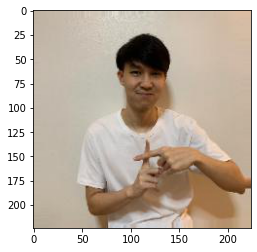

(1, 224, 224, 3)


In [ ]:
# Load image to visualize intermediate activations
from keras.preprocessing import image
img_path = '/content/train/add/aug__0_127.jpg'
img = image.load_img(img_path, target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
# predicting images
labels = ['add', 'animal']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
classes = model3.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(classes,axis=1)[0]])

Predicted class is: animal


Layer # 0 , Shape : (1, 224, 224, 3)


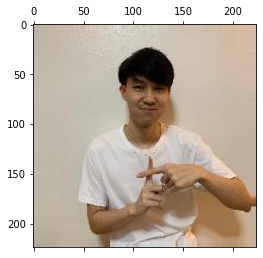

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 1 , Shape : (1, 224, 224, 3)


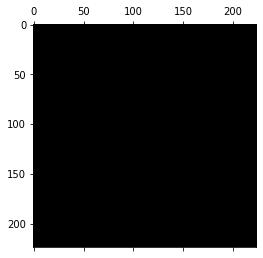

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 2 , Shape : (1, 112, 112, 16)


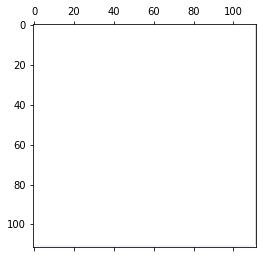

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 3 , Shape : (1, 112, 112, 16)


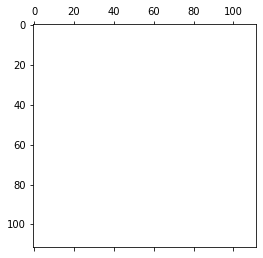

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 4 , Shape : (1, 112, 112, 16)


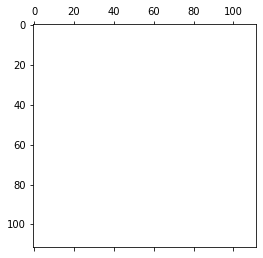

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 5 , Shape : (1, 112, 112, 16)


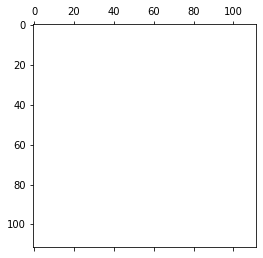

Layer # 6 , Shape : (1, 112, 112, 16)


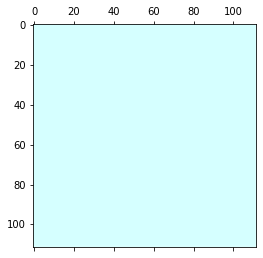

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 7 , Shape : (1, 112, 112, 16)


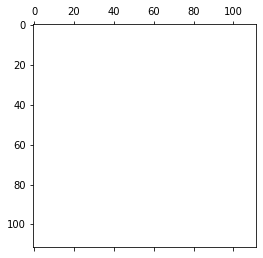

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 8 , Shape : (1, 113, 113, 16)


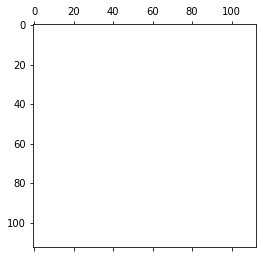

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 9 , Shape : (1, 56, 56, 16)


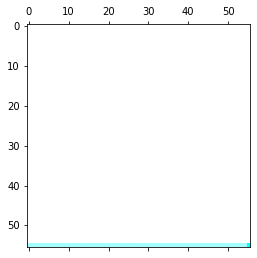

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 10 , Shape : (1, 56, 56, 16)


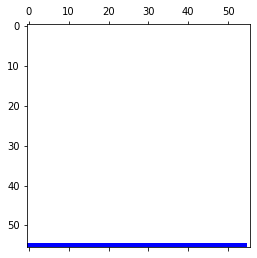

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer # 11 , Shape : (1, 56, 56, 16)


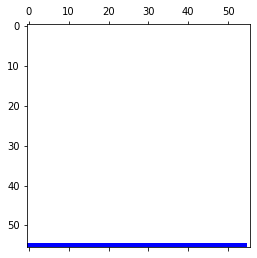

Layer # 12 , Shape : (1, 1, 1, 16)


IndexError: ignored

In [ ]:
# Visualize intermediate activations
layer_outputs = [layer.output for layer in model3.layers]
 # Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model3.input, outputs=layer_outputs)
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor) 
i = 0

for act in activations:
  if(len(act.shape) == 4): # Show only convolution and pooling layers
    print('Layer #', i, ', Shape :', act.shape)
    i += 1
    plt.matshow(act.squeeze()[ :, :, 0:4])
    plt.show()

